#Домашнее задание 3
по курсу "8 недель ИИ"

In [182]:
# Загружаем Пандас и таблицы с Гитхаба
import pandas as pd
sheet2904 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-29-2021.csv')
sheet3004 = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-30-2021.csv')

In [183]:
# Проверям оба датафрейма
sheet2904.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-04-30 04:21:03,33.93911,67.709953,59576,2618,53103.0,3855.0,Afghanistan,153.040172,4.394387
1,NaN,NaN,NaN,Albania,2021-04-30 04:21:03,41.15330,20.168300,130977,2389,108606.0,19982.0,Albania,4551.289179,1.823984
2,NaN,NaN,NaN,Algeria,2021-04-30 04:21:03,28.03390,1.659600,121866,3244,84940.0,33682.0,Algeria,277.909011,2.661940
3,NaN,NaN,NaN,Andorra,2021-04-30 04:21:03,42.50630,1.521800,13198,125,12650.0,423.0,Andorra,17081.472853,0.947113
4,NaN,NaN,NaN,Angola,2021-04-30 04:21:03,-11.20270,17.873900,26431,594,23606.0,2231.0,Angola,80.419840,2.247361


In [184]:
sheet3004.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-05-01 04:20:47,33.93911,67.709953,59745,2625,53206.0,3914.0,Afghanistan,153.474303,4.393673
1,NaN,NaN,NaN,Albania,2021-05-01 04:20:47,41.15330,20.168300,131085,2394,109338.0,19353.0,Albania,4555.042046,1.826296
2,NaN,NaN,NaN,Algeria,2021-05-01 04:20:47,28.03390,1.659600,122108,3253,85108.0,33747.0,Algeria,278.460879,2.664035
3,NaN,NaN,NaN,Andorra,2021-05-01 04:20:47,42.50630,1.521800,13232,125,12684.0,423.0,Andorra,17125.477254,0.944680
4,NaN,NaN,NaN,Angola,2021-05-01 04:20:47,-11.20270,17.873900,26652,596,23876.0,2180.0,Angola,81.092262,2.236230


In [185]:
# Выбрасываем ненужные столбцы
# оставляем только 'Province_State', 'Last_Update', 'Confirmed', 'Deaths', 'Recovered', 'Active'
sheet2904.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [186]:
sheet2904.drop(columns=['FIPS', 'Admin2', 'Country_Region', 'Lat', 'Long_', 
                        'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'], inplace=True)
sheet3004.drop(columns=['FIPS', 'Admin2', 'Country_Region', 'Lat', 'Long_', 
                        'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'], inplace=True)

In [187]:
sheet2904.head()

,Province_State,Last_Update,Confirmed,Deaths,Recovered,Active
0,NaN,2021-04-30 04:21:03,59576,2618,53103.0,3855.0
1,NaN,2021-04-30 04:21:03,130977,2389,108606.0,19982.0
2,NaN,2021-04-30 04:21:03,121866,3244,84940.0,33682.0
3,NaN,2021-04-30 04:21:03,13198,125,12650.0,423.0
4,NaN,2021-04-30 04:21:03,26431,594,23606.0,2231.0


In [188]:
# Оставляем из строк только Санкт-Петербург и Ленинградскую область в обеих таблицах и склеиваем
sheet2904 = sheet2904.query('Province_State in ("Leningrad Oblast", "Saint Petersburg")')
sheet3004 = sheet3004.query('Province_State in ("Leningrad Oblast", "Saint Petersburg")')
sheet2904.head()

,Province_State,Last_Update,Confirmed,Deaths,Recovered,Active
532,Leningrad Oblast,2021-04-30 04:21:03,42487,1156,39803.0,1528.0
554,Saint Petersburg,2021-04-30 04:21:03,415015,13181,373725.0,28109.0


In [189]:
# Объединяем таблицы в одну итоговую
df = sheet2904.merge(sheet3004, how='outer')
df

,Province_State,Last_Update,Confirmed,Deaths,Recovered,Active
0,Leningrad Oblast,2021-04-30 04:21:03,42487,1156,39803.0,1528.0
1,Saint Petersburg,2021-04-30 04:21:03,415015,13181,373725.0,28109.0
2,Leningrad Oblast,2021-05-01 04:20:47,42572,1167,39885.0,1520.0
3,Saint Petersburg,2021-05-01 04:20:47,415740,13214,374736.0,27790.0


In [190]:
# Забыли привести типы данных в нормальный вид. Сначала проверим, что есть.
df.dtypes

Province_State     object
Last_Update        object
Confirmed           int64
Deaths              int64
Recovered         float64
Active            float64
dtype: object

In [191]:
# 'Recovered' и 'Active' для красоты приводим в int. Last_Update оставим в виде 
# строки, но обрежем - останется только дата обновления - месяц и день
df[['Recovered', 'Active']] = df[['Recovered', 'Active']].astype('int')
df['Last_Update'] = df['Last_Update'].str[5:10]
# И проверяем что получилось
df

,Province_State,Last_Update,Confirmed,Deaths,Recovered,Active
0,Leningrad Oblast,04-30,42487,1156,39803,1528
1,Saint Petersburg,04-30,415015,13181,373725,28109
2,Leningrad Oblast,05-01,42572,1167,39885,1520
3,Saint Petersburg,05-01,415740,13214,374736,27790


In [192]:
# Собираем сводную таблицу
df_pivot = df.pivot_table(index='Province_State', columns='Last_Update', values=['Confirmed', 'Deaths', 'Recovered', 'Active']) #
df_pivot

Active        Confirmed  ... Deaths Recovered        
Last_Update       04-30  05-01     04-30  ...  05-01     04-30   05-01
Province_State                            ...                         
Leningrad Oblast   1528   1520     42487  ...   1167     39803   39885
Saint Petersburg  28109  27790    415015  ...  13214    373725  374736

[2 rows x 8 columns]

In [193]:
# Добавляем данные о приросте (Increment)
# Можно было через цикл перебрать все столбцы, но уже было поздно и лень
df_pivot['incr_active'] = df_pivot['Active']['05-01'] - df_pivot['Active']['04-30']
df_pivot['incr_confirmed'] = df_pivot['Confirmed']['05-01'] - df_pivot['Confirmed']['04-30']
df_pivot['incr_deaths'] = df_pivot['Deaths']['05-01'] - df_pivot['Deaths']['04-30']
df_pivot['incr_recovered'] = df_pivot['Recovered']['05-01'] - df_pivot['Recovered']['04-30']
# df_pivot.columns
df_pivot
# Чего и требовалось доказать

Active         ... incr_deaths incr_recovered
Last_Update       04-30  05-01  ...                           
Province_State                  ...                           
Leningrad Oblast   1528   1520  ...          11             82
Saint Petersburg  28109  27790  ...          33           1011

[2 rows x 12 columns]

#Нарисуем гистограмму по заболевшим по регионам России и посчитаем заодно заболевших
Сначала еще раз читаем исходныек данные

Фильтруем данные, оставляем только Россию

Фактически, в этом задании, нас интересует только регион и количество заболевших

In [201]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-30-2021.csv')
df = df[df['Country_Region'] == 'Russia']
df.drop(columns=['FIPS', 'Admin2', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'], inplace=True)
df.reset_index(inplace=True, drop=True)
df.set_axis(['region', 'active'], axis='columns', inplace=True,)
df

,region,active
0,Adygea Republic,14424
1,Altai Krai,49663
2,Altai Republic,16807
3,Amur Oblast,22299
4,Arkhangelsk Oblast,61940
...,...,...
78,Vologda Oblast,44834
79,Voronezh Oblast,80568
80,Yamalo-Nenets Autonomous Okrug,38547
81,Yaroslavl Oblast,38635


In [213]:
# Всего заболевших в России
print('Total active in Russia:', df['active'].sum())

Total active in Russia: 4750755


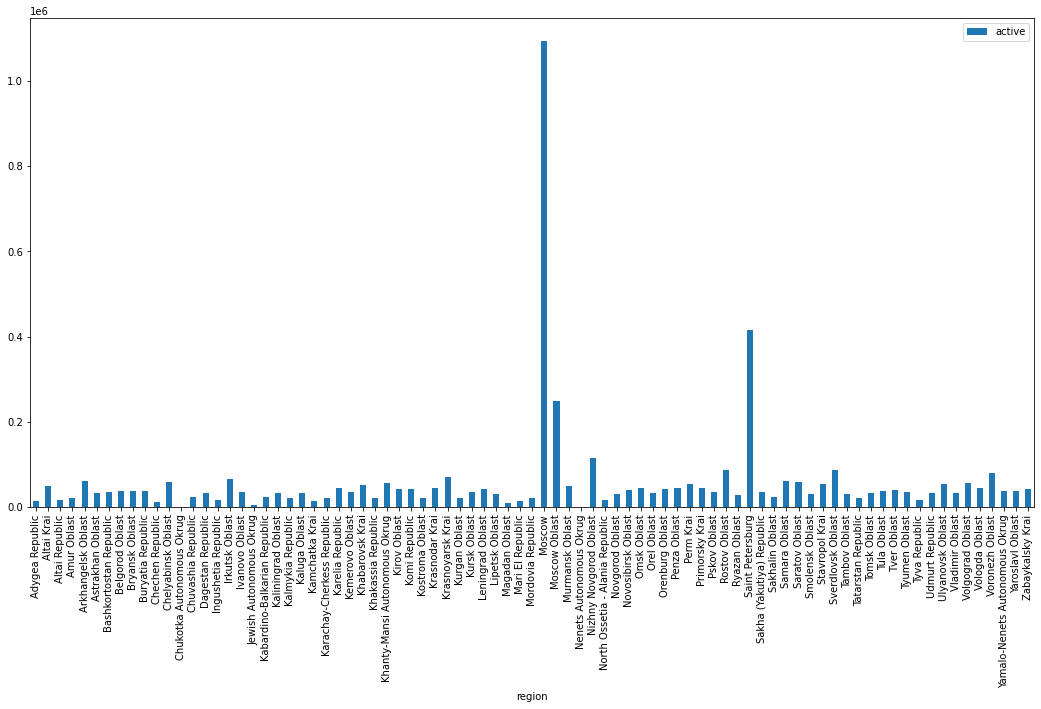

In [226]:
# Гистограмма получается кривая и неинформативная, поэтому выбран столбчатый график
# по шкале Y - число заболевших в миллионах
df.plot(kind='bar', x='region', y='active', figsize=(18, 9))